In [1]:
import sys
import numpy as np

from PySDM.backends import CPU
from PySDM.builder import Builder
from PySDM.environments import Box
from PySDM.dynamics import Coalescence
from PySDM.dynamics import Breakup
from PySDM.dynamics import Coalescence
from PySDM.initialisation.spectral_sampling import ConstantMultiplicity

from PySDM.products.state import ParticlesVolumeSpectrum, ParticlesConcentration, ParticleMeanRadius
#from PySDM.products.dynamics.breakup import BreakupFragments
from PySDM.products.stats.timers import WallTime

from matplotlib import pyplot

In [9]:
from PySDM.initialisation.spectra import Exponential
from PySDM.physics.coalescence_kernels import ConstantK, Golovin
from PySDM.physics.breakup_fragmentations import AlwaysN
from PySDM.physics.constants import si
from PySDM.physics.formulae import Formulae
#from pystrict import strict

#@strict
class Settings:

    def __init__(self):
        self.formulae = Formulae()
        self.n_sd = 4
        self.n_part = 100 / si.cm**3
        self.X0 = self.formulae.trivia.volume(radius=30.531 * si.micrometres)
        self.dv = 1 * si.cm**3
        self.norm_factor = self.n_part * self.dv
        self.rho = 1000 * si.kilogram / si.metre**3
        self.dt = 1 * si.seconds
        self.adaptive = False
        self.seed = 44
        self._steps = [0, 1, 2]
        self.kernel = Golovin(b=1.5e3 / si.second)
        #self.breakup_kernel = ConstantK(a=100000 * si.cm**3 / si.second)
        self.breakup_kernel = Golovin(b = 1500e2 / si.second)
        self.fragmentation = AlwaysN(n=2)
        self.spectrum = Exponential(norm_factor=self.norm_factor, scale=self.X0)
        self.radius_bins_edges = np.logspace(np.log10(10 * si.um), np.log10(100 * si.um), num=128, endpoint=True)
        self.radius_range = [0 * si.um, 1e6 * si.um]

    @property
    def output_steps(self):
        return [int(step/self.dt) for step in self._steps]

initialized
registered
0
0
0
called run
[27.16174765] [100.]
1
0
1
called run
dynamic is Breakup
0. called step
1. list made
2. tossed pairs
3. computed prob
3b. computed n_fragment
4. computed gamma
5. breakup done
[12.54458135] [1250.]
2
1
1
called run
dynamic is Breakup
0. called step
1. list made
2. tossed pairs
3. computed prob
3b. computed n_fragment
4. computed gamma
5. breakup done
[2.32793532] [195314.]


Text(0, 0.5, 'dm/dlnr')

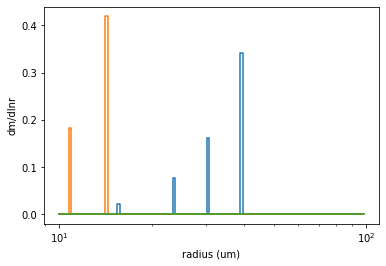

In [10]:
settings = Settings()
backend = CPU

builder = Builder(n_sd=settings.n_sd, backend=backend, formulae=settings.formulae)
builder.set_environment(Box(dv=settings.dv, dt=settings.dt))
attributes = {}
attributes['volume'], attributes['n'] = ConstantMultiplicity(settings.spectrum).sample(settings.n_sd)
breakup = Breakup(settings.breakup_kernel, settings.fragmentation, adaptive=settings.adaptive)
builder.add_dynamic(breakup)
#coalescence = Coalescence(settings.breakup_kernel, adaptive=settings.adaptive)
#builder.add_dynamic(coalescence)
products = [ParticlesVolumeSpectrum(), WallTime(), ParticleMeanRadius(), ParticlesConcentration(radius_range = settings.radius_range)]
core = builder.build(attributes, products)

for step in settings.output_steps:
    print(step)
    print(core.n_steps)
    print(step - core.n_steps)
    core.run(step - core.n_steps)
    pyplot.step(x=settings.radius_bins_edges[:-1] / si.micrometres, 
                y=core.products['dv/dlnr'].get(settings.radius_bins_edges) * settings.rho,
                where='post', label="t = {step*settings.dt}s")
    print(core.products['radius_m1'].get(), core.products['n_a_cm3'].get())
    
pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr")

In [4]:
* Sometimes hangs on illegal print statements in Numba
* current source of error: self.kernel is computed wrong

SyntaxError: invalid syntax (<ipython-input-4-9f598eeeb379>, line 1)